# Annotating the data

Created: **19/07/18**  
Last modified: **20/08/18**

**Goal:** enrich the cleaned data `cleaned_IMPACT_mutations_180508.txt` by adding some features:
* `Kaviar_AF`
* `cosmic_count`
* `is_a_hotspot`
* `is_a_3d_hotspot`
* `oncogenic`
* `gene_type`
* `BAM_id`
* `cancer_code`
* `cancer_type`

This notebook is divided in four parts:
* **1. `Kaviar_AF` and `cosmic_count`**: get the `KAVIAR_AF` and `cosmic_count` features, basic study of the features
* **2. OncoKB annotations**: get the `is_a_hotspot`, `is_a_3d_hotspot` and `oncogenic` features
* **3. CancerGenesList**: get the `gene_type` feature
* **4. Keys annotations**: get the `BAM_id`, `cancer_code` and `cancer_type` features
* **5. Resume of the operations needed to get the additional features**

The process to add some features from `another_dataframe` will always be the same and each section will be divided in the following subsections:
1. Get the raw dataframe `another_dataframe`
2. Create keys to join the dataframe `impact` and `another_dataframe`. Two verifications to do:
    1. every key in `another_dataframe` has unique values for the features we want to add (we are going to do a left join)
    2. every key in `impact` has an analoguous key in `another_dataframe` (otherwise some `NA` values will appear and need to be handled)
3. Process the new features (parse, change format, shape...)

**Refs:**
* [annation.ipynb [Dominik]](
https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/180515_dominik/annotation.ipynb)
* [parseCosmic.R [Dominik]](
https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/180515_dominik/parseCosmic.R)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kaviar_AF-and-cosmic_count" data-toc-modified-id="Kaviar_AF-and-cosmic_count-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><code>Kaviar_AF</code> and <code>cosmic_count</code></a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Kaviar_AF" data-toc-modified-id="Kaviar_AF-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>Kaviar_AF</code></a></span></li><li><span><a href="#cosmic70" data-toc-modified-id="cosmic70-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><code>cosmic70</code></a></span></li></ul></li><li><span><a href="#OncoKB-annotations" data-toc-modified-id="OncoKB-annotations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>OncoKB annotations</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#is_a_hotspot" data-toc-modified-id="is_a_hotspot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>is_a_hotspot</code></a></span></li><li><span><a href="#is_a_3d_hotspot" data-toc-modified-id="is_a_3d_hotspot-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><code>is_a_3d_hotspot</code></a></span></li><li><span><a href="#oncogenic" data-toc-modified-id="oncogenic-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><code>oncogenic</code></a></span></li></ul></li><li><span><a href="#CancerGenesList" data-toc-modified-id="CancerGenesList-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CancerGenesList</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#gene_type" data-toc-modified-id="gene_type-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><code>gene_type</code></a></span></li></ul></li><li><span><a href="#Keys-annotations" data-toc-modified-id="Keys-annotations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Keys annotations</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#BAM_id" data-toc-modified-id="BAM_id-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><code>BAM_id</code></a></span></li><li><span><a href="#cancer_code" data-toc-modified-id="cancer_code-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span><code>cancer_code</code></a></span></li><li><span><a href="#cancer_type" data-toc-modified-id="cancer_type-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span><code>cancer_type</code></a></span></li></ul></li><li><span><a href="#Test-cbioportal" data-toc-modified-id="Test-cbioportal-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Test cbioportal</a></span></li><li><span><a href="#Resume-of-the-operations-needed-to-get-the-additional-features" data-toc-modified-id="Resume-of-the-operations-needed-to-get-the-additional-features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Resume of the operations needed to get the additional features</a></span></li></ul></div>

***

In [1]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

In [2]:
impact <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

## `Kaviar_AF` and `cosmic_count`

Get the `Kaviar_AF` and `cosmic_count` features from `all_IMPACT_mutations_180508.simple.hg19_multianno.txt` (impact annotated by Dominik).

### Get the raw data

In [3]:
impact_annotated <- read.table("../../../data/dominik/all_IMPACT_mutations_180508.simple.hg19_multianno.txt",
                               sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [4]:
ncol(impact_annotated)
nrow(impact_annotated)
head(impact_annotated)

[1] 44

[1] 588547

Chr,Start,End,Ref,Alt,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,⋯,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,X1000g2015aug_all,Kaviar_AF,Kaviar_AC,Kaviar_AN,cosmic70
1,16265908,16265908,A,T,0.0,D,0.999,D,0.982,⋯,1.062,1.199,1.000,1.000,12.000,.,.,.,.,.
2,29543736,29543736,A,G,0.539,T,0.0,B,0.0,⋯,-0.056,0.117,0.186,0.336,6.380,0.0159744,0.0300125,4640,154602,ID=COSM3758202;OCCURENCE=1(large_intestine)
2,242793433,242793433,G,A,0.019,D,0.816,P,0.261,⋯,0.868,0.782,0.013,0.002,7.501,0.136781,0.0760792,11762,154602,.
5,56177843,56177843,C,G,0.002,D,0.102,B,0.078,⋯,0.871,0.935,0.982,0.984,13.098,0.00738818,0.0141072,2181,154602,.
5,180030313,180030313,C,A,0.65,T,0.0,B,0.001,⋯,0.021,-1.521,0.004,0.001,2.012,.,0.0789964,12213,154602,.
5,180051003,180051003,T,C,0.225,T,0.029,B,0.015,⋯,0.079,0.888,0.897,0.281,5.808,0.0529153,0.0911566,14093,154602,.


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_annotated`. The keys will be: 
* `mut_key` for `impact`
* `Chr`\_`Start`\_`Red`_`Alt` for `impact_annotated`

In [5]:
# create the impact_annotated join_key
impact_annotated$join_key <- paste(impact_annotated$Chr,
                                   impact_annotated$Start,
                                   impact_annotated$Ref,
                                   impact_annotated$Alt,
                                   sep = '_')

**Verification 1** The features `Kaviar_AF` and `cosmic70` are unique for each `join_key`:

In [6]:
nrow(impact_annotated %>% group_by(join_key) %>% filter(length(unique(Kaviar_AF)) > 1 |
                                                        length(unique(cosmic70)) > 1))
impact_annotated <- unique(impact_annotated[, c("join_key", "Kaviar_AF", "cosmic70")])
head(impact_annotated, 4)

[1] 0

join_key,Kaviar_AF,cosmic70
1_16265908_A_T,.,.
2_29543736_A_G,0.0300125,ID=COSM3758202;OCCURENCE=1(large_intestine)
2_242793433_G_A,0.0760792,.
5_56177843_C_G,0.0141072,.


**Verification 2** Every impact `mut_key` has an analoguous `join_key` in `impact_annotated`:

In [7]:
nrow(impact[! impact$mut_key %in% impact_annotated$join_key,])

[1] 0

In [8]:
impact[, c("Kaviar_AF", "cosmic70")] <- left_join(impact,
                                                  impact_annotated,
                                                  by = c("mut_key" = "join_key"))[, c("Kaviar_AF", "cosmic70")]

### `Kaviar_AF`

We assume every value `'.'` of the `Kaviar_AF` feature is 0 (ie `'0'`). We convert every `Kaviar_AF` string to a double, to obtain the final feature.

In [9]:
head(unique(impact$Kaviar_AF))
impact$Kaviar_AF[(impact$Kaviar_AF == '.')] <- list('0')
impact$Kaviar_AF <- sapply(impact$Kaviar_AF, function(s) as.double(s))
head(unique(impact$Kaviar_AF))

[1] "."         "6.5e-06"   "1.29e-05"  "5.17e-05"  "1.94e-05"  "0.0006404"

[1] 0.0000000 0.0000065 0.0000129 0.0000517 0.0000194 0.0006404

(warning, sqrt x and y scale)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0000000 0.0002679 0.0000065 0.3192330 

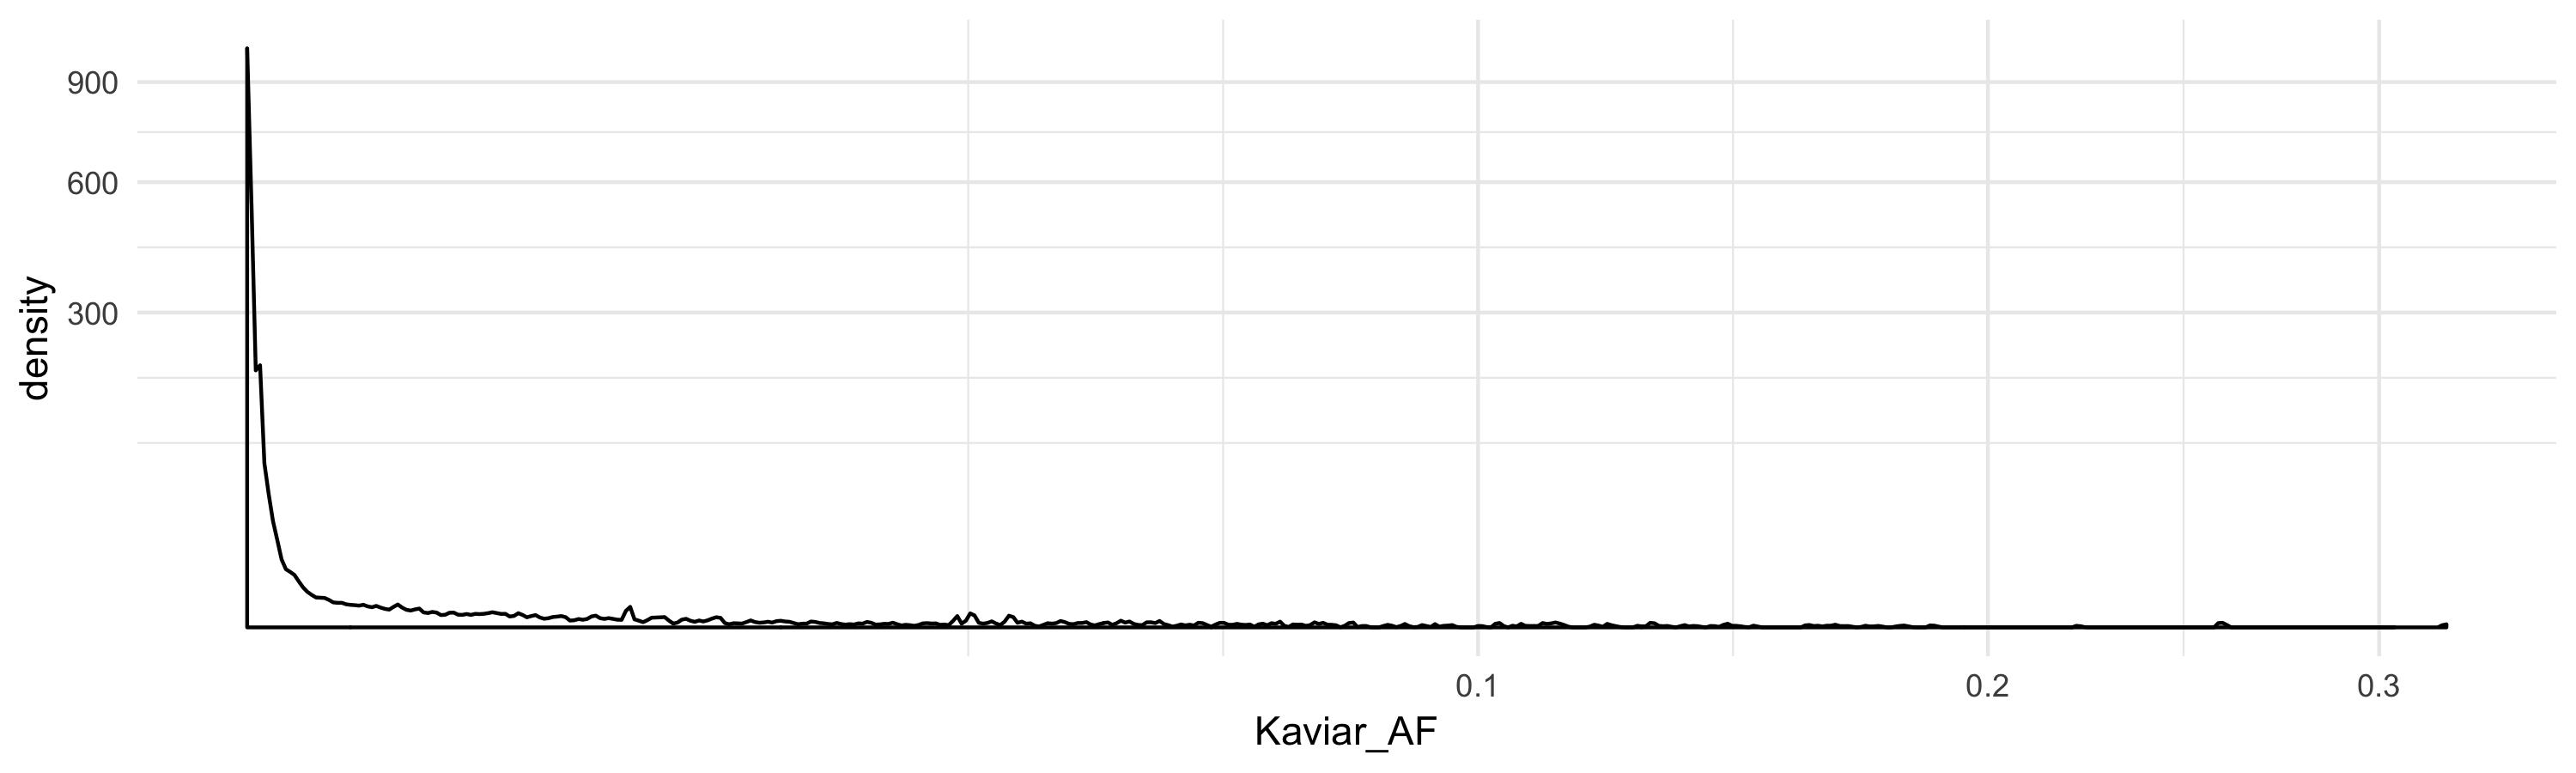

In [10]:
summary(impact$Kaviar_AF)
plot_density(impact, "Kaviar_AF") + scale_x_sqrt() + scale_y_sqrt()

### `cosmic70`

We assume every value `'.'` of the `cosmic70` feature means an occurence of 0 (ie `'OCCURENCE=0'`):

In [11]:
head(unique(impact$cosmic70), 5)
impact$cosmic70[(impact$cosmic70 == '.')] <- list('OCCURENCE=0')
head(unique(impact$cosmic70), 5)

[1] "ID=COSM45830;OCCURENCE=1(ovary)"                                                                                                           
[2] "."                                                                                                                                         
[3] "ID=COSM3782300,COSM3782297,COSM3782296,COSM3782298,COSM3782301,COSM3782299;OCCURENCE=1(pancreas)"                                          
[4] "ID=COSM3693022;OCCURENCE=1(large_intestine)"                                                                                               
[5] "ID=COSM5666;OCCURENCE=5(stomach),10(central_nervous_system),1(ovary),1(soft_tissue),2(endometrium),1(breast),4(skin),10(liver),3(pancreas)"

[[1]]
[1] "ID=COSM45830;OCCURENCE=1(ovary)"

[[2]]
[1] "OCCURENCE=0"

[[3]]
[1] "ID=COSM3782300,COSM3782297,COSM3782296,COSM3782298,COSM3782301,COSM3782299;OCCURENCE=1(pancreas)"

[[4]]
[1] "ID=COSM3693022;OCCURENCE=1(large_intestine)"

[[5]]
[1] "ID=COSM5666;OCCURENCE=5(stomach),10(central_nervous_system),1(ovary),1(soft_tissue),2(endometrium),1(breast),4(skin),10(liver),3(pancreas)"

The following function, `get_cosmic_count()` returns the sum of the occurence found in the cosmic string, ie the cosmic count. The cells after shows an exemple explaining how it works.

In [12]:
get_cosmic_count <- function(cosmic_string) {
    cosmic_string <- strsplit(cosmic_string, "OCCURENCE=")[[1]][2]
    cosmic_string <- strsplit(cosmic_string, ',')[[1]]
    cosmic_string <- sapply(cosmic_string, function(element) as.integer(strsplit(element, '\\(')[[1]][1]))
                
    return (sum(cosmic_string))
}

In [13]:
print(get_cosmic_count("ID=COSM3693022;OCCURENCE=1(large_intestine)"))
print(get_cosmic_count("ID=;OCCURENCE=0"))
print(get_cosmic_count("ID=COSM5219;OCCURENCE=3(lung),5(central_nervous_system),3(ovary),96(endometrium)"))

[1] 1
[1] 0
[1] 107


In [14]:
cosmic_string <- "ID=COSM5219;OCCURENCE=3(lung),5(central_nervous_system),3(ovary),96(endometrium)"

print("######## STEP 1 ########")
print(cosmic_string <- strsplit(cosmic_string, "OCCURENCE=")[[1]][2])

print("######## STEP 2 ########")
print(cosmic_string <- strsplit(cosmic_string, ',')[[1]])

print("######## STEP 3 ########")
print(cosmic_string <- sapply(cosmic_string, function(element) as.integer(strsplit(element, '\\(')[[1]][1])))
                  
sum(cosmic_string)

[1] "######## STEP 1 ########"
[1] "3(lung),5(central_nervous_system),3(ovary),96(endometrium)"
[1] "######## STEP 2 ########"
[1] "3(lung)"                   "5(central_nervous_system)"
[3] "3(ovary)"                  "96(endometrium)"          
[1] "######## STEP 3 ########"
                  3(lung) 5(central_nervous_system)                  3(ovary) 
                        3                         5                         3 
          96(endometrium) 
                       96 


[1] 107

We convert every `cosmic70` string to a integer, the cosmic count given by the `get_cosmic_count()`, and replace the `cosmic70` feature by the `cosmic_count` feature.

In [15]:
impact$cosmic_count <- sapply(impact$cosmic70, get_cosmic_count)
impact$cosmic70 <- NULL

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0   171.6     0.0 33328.0 

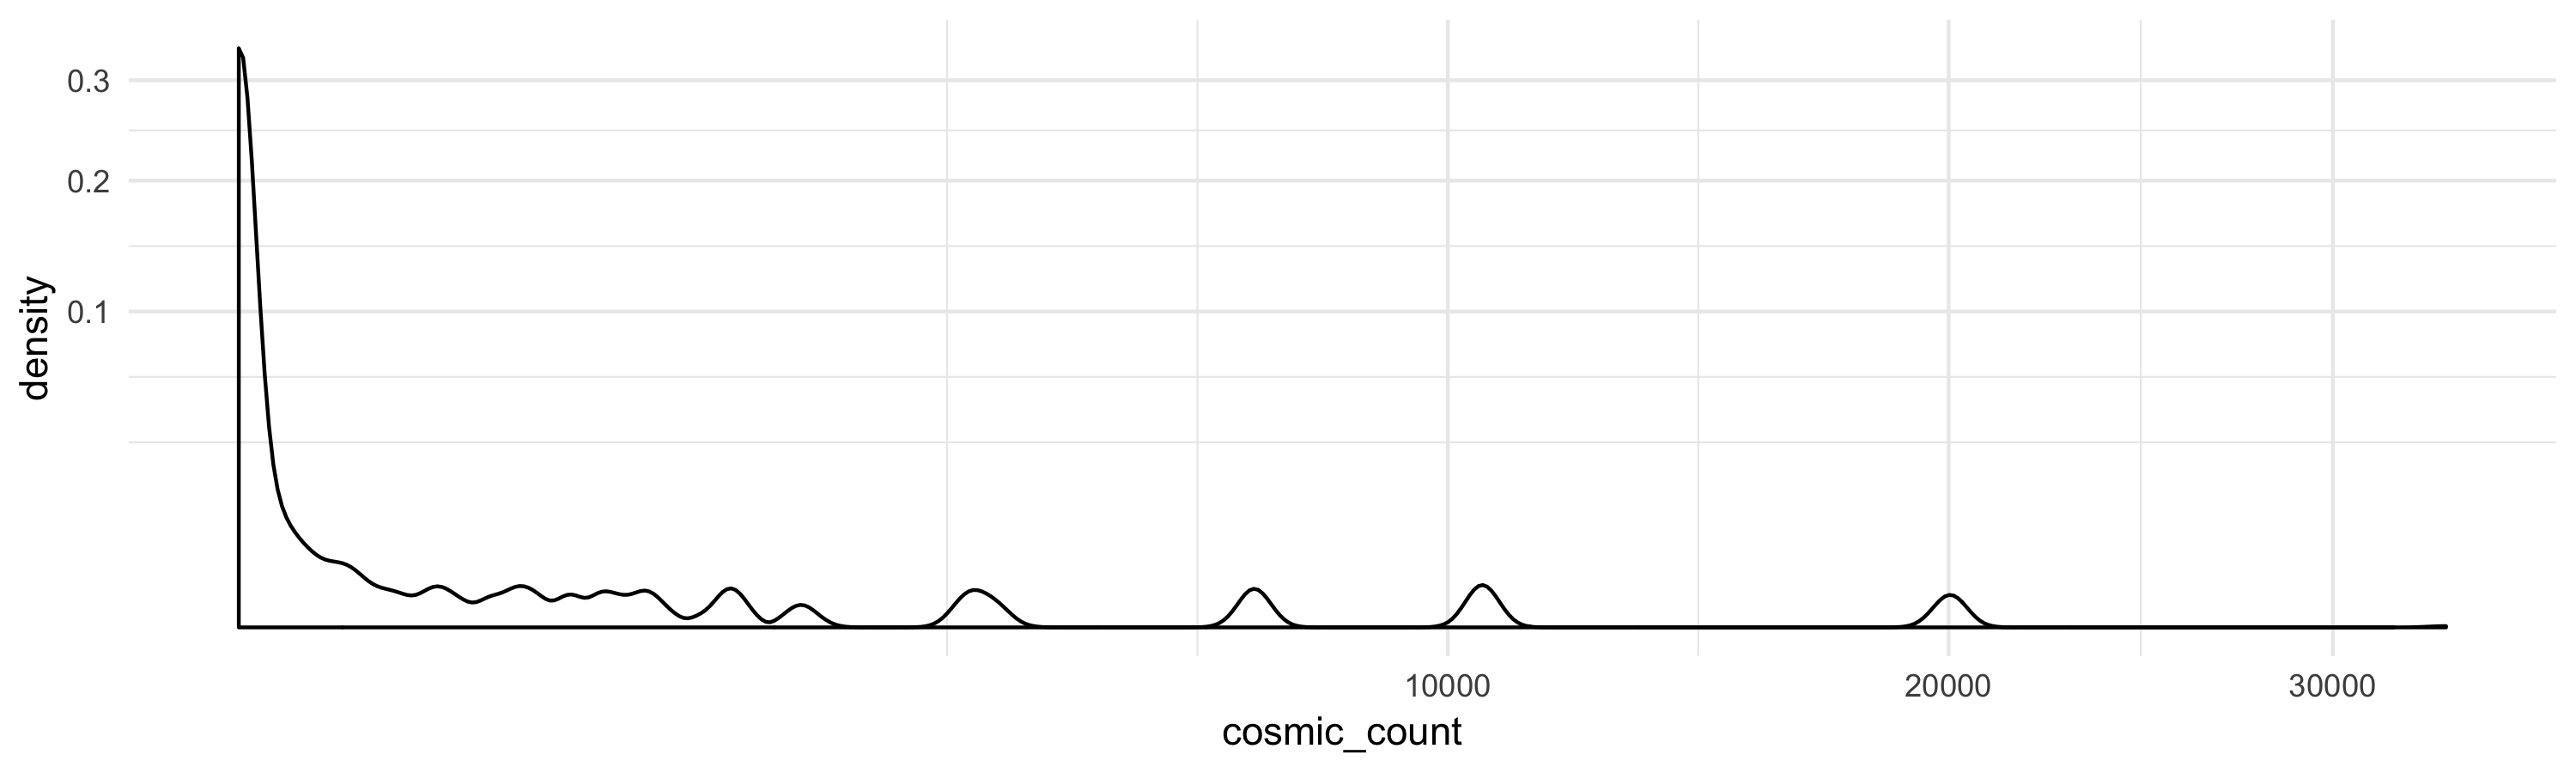

In [16]:
summary(impact$cosmic_count)
plot_density(impact, "cosmic_count") + scale_x_sqrt() + scale_y_sqrt()

## OncoKB annotations

Get the `is_a_hotspot`,`is_a_3d_hotspot` and `oncogenic` features from `oncokb_annotated_cleaned_IMPACT_mutations_180508.txt` (impact annotated by Pierre with oncokb-annotator, see ...).

### Get the raw data

In [17]:
impact_oncokb <- read.table("../../../data/oncokb_annotate/oncokb_annotated_cleaned_IMPACT_mutations_180508.txt",
                             sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [18]:
ncol(impact_oncokb)
nrow(impact_oncokb)
head(impact_oncokb)

[1] 38

[1] 248293

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,⋯,is.a.3d.hotspot,oncogenic,LEVEL_1,LEVEL_2A,LEVEL_2B,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,Highest_level
TP53,17,7577515,7577515,nonsynonymous_SNV,SNP,T,G,P-0000012-T02-IM3,c.766A>C,⋯,,Oncogenic,NA,NA,,NA,,,NA,
ARID1A,1,27101572,27101572,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.4854C>G,⋯,,,NA,NA,,NA,,,NA,
PTPRS,19,5244030,5244030,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.1452G>C,⋯,,,NA,NA,,NA,,,NA,
PIK3R3,1,46521514,46521514,nonsynonymous_SNV,SNP,G,C,P-0000012-T03-IM3,c.894C>G,⋯,,,NA,NA,,NA,,,NA,
ATR,3,142178126,142178126,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,c.7292G>T,⋯,,,NA,NA,,NA,,,NA,
PDGFRA,4,55139732,55139732,nonsynonymous_SNV,SNP,T,A,P-0000012-T03-IM3,c.1393T>A,⋯,,,NA,NA,,NA,,,NA,


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_oncokb`. The keys will be `mut_key` for both dataset, and are already created.

**Verification 1** The features `oncogenic`, `is.a.hotspot`, and `is.a.3d.hotspot` are unique for each `mut_key`:

In [19]:
nrow(impact_oncokb %>% group_by(mut_key) %>%
                       filter(length(unique(is.a.hotspot)) > 1 |
                              length(unique(is.a.3d.hotspot)) > 1 |
                              length(unique(oncogenic)) > 1))
impact_oncokb <- unique(impact_oncokb[, c("mut_key", "is.a.hotspot", "is.a.3d.hotspot", "oncogenic")])
head(impact_oncokb, 4)

[1] 0

mut_key,is.a.hotspot,is.a.3d.hotspot,oncogenic
17_7577515_T_G,,,Oncogenic
1_27101572_C_G,,,
19_5244030_C_G,,,
1_46521514_G_C,,,


**Verification 2** Every impact `mut_key` has an analoguous `join_key` in `impact_annotated`:

In [20]:
nrow(impact[! impact$mut_key %in% impact_oncokb$mut_key,])

[1] 0

In [21]:
impact[, c("is_a_hotspot",
           "is_a_3d_hotspot",
           "oncogenic")] <- left_join(impact, impact_oncokb,
                                      by = c("mut_key" = "mut_key"))[, c("is.a.hotspot",
                                                                         "is.a.3d.hotspot",
                                                                         "oncogenic")]

### `is_a_hotspot`

In [22]:
impact$is_a_hotspot[impact$is_a_hotspot == "Y"  ] <- "yes"
impact$is_a_hotspot[impact$is_a_hotspot != "yes"] <- "unknown"
table(impact$is_a_hotspot)


unknown     yes 
 222661   25632 

### `is_a_3d_hotspot`

In [23]:
impact$is_a_3d_hotspot[impact$is_a_3d_hotspot == "Y"  ] <- "yes"
impact$is_a_3d_hotspot[impact$is_a_3d_hotspot != "yes"] <- "unknown"
table(impact$is_a_3d_hotspot)


unknown     yes 
 233138   15155 

### `oncogenic`

In [24]:
impact$oncogenic[impact$oncogenic == ""] <- "Unknown"
table(impact$oncogenic)


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                523                 385               47127               16367 
Predicted Oncogenic             Unknown 
               2900              180991 

## CancerGenesList

Get the `gene_type` feature from `CancerGenesList.txt` (downloaded from http://oncokb.org/#/cancerGenes, the upper right button "CANCER GENE LIST").

### Get the raw data

In [25]:
cancer_genes_list <- read.table("../../../data/other_databases/CancerGenesList.txt",
                                sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment.char = '')

In [26]:
ncol(cancer_genes_list)
nrow(cancer_genes_list)
head(cancer_genes_list)

[1] 11

[1] 1019

Hugo.Symbol,X..of.occurence.within.resources,OncoKB.Annotated,OncoKB.Oncogene,OncoKB.TSG,MSK.IMPACT,MSK.HEME,Foundation.One,Foundation.One.Heme,Vogelstein,Sanger.CGC
ABL1,7,Yes,Yes,,Yes,Yes,Yes,Yes,Yes,Yes
ABL2,3,No,,,No,No,Yes,Yes,No,Yes
ACTB,1,No,,,No,No,No,Yes,No,No
ACTG1,1,No,,,No,Yes,No,No,No,No
ACVR1,3,Yes,Yes,,Yes,No,No,No,No,Yes
ACVR1B,2,No,,,No,No,Yes,No,Yes,No


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `cancer_genes_list`. The keys will be: 
* `Hugo_Symbol` for `impact`
* `Hugo.Symbol` for `impact_annotated`

**Verification 1** The feature `OncoKB.Oncogene` and `OncoKB.TSG` are unique for each key:

In [27]:
nrow(cancer_genes_list %>% group_by(Hugo.Symbol) %>% filter(length(unique(OncoKB.Oncogene)) > 1 |
                                                            length(unique(OncoKB.TSG)) > 1))
cancer_genes_list <- unique(cancer_genes_list[, c("Hugo.Symbol", "OncoKB.Oncogene", "OncoKB.TSG")])
head(cancer_genes_list, 4)

[1] 0

Hugo.Symbol,OncoKB.Oncogene,OncoKB.TSG
ABL1,Yes,
ABL2,,
ACTB,,
ACTG1,,


**Verification 2** Some impact `Hugo_Symbol` don't have an analoguous `Hugo.Symbol` in `impact_annotated`, some `NA` values will appear and need to be handled:

In [28]:
length(unique(impact$Hugo_Symbol[! impact$Hugo_Symbol %in% cancer_genes_list$Hugo.Symbol]))
unique(impact$Hugo_Symbol[! impact$Hugo_Symbol %in% cancer_genes_list$Hugo.Symbol])

[1] 16

[1] "PAK5"         "COP1"         "TENT5C"       "MRE11"        "CDKN2Ap14ARF"
 [6] "PRKN"         "ABRAXAS1"     "RFFL"         "INSRR"        "TIMM8B"      
[11] "OBSL1"        "ELOC"         "SDCCAG8"      "NSD2"         "NSD3"        
[16] "CCNQ"

In [29]:
impact[, c("OncoKB.Oncogene", "OncoKB.TSG")] <- left_join(impact, cancer_genes_list,
                                                          by = c("Hugo_Symbol" = "Hugo.Symbol"))[,c("OncoKB.Oncogene", "OncoKB.TSG")]

In [30]:
head(impact)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,⋯,mut_key,sample_mut_key,frequency_in_normals,Kaviar_AF,cosmic_count,is_a_hotspot,is_a_3d_hotspot,oncogenic,OncoKB.Oncogene,OncoKB.TSG
TP53,17,7577515,7577515,nonsynonymous_SNV,SNP,T,G,P-0000012-T02-IM3,c.766A>C,⋯,17_7577515_T_G,P-0000012-T02-IM3_17_7577515_T_G,0,0.0e+00,1,unknown,unknown,Oncogenic,,Yes
ARID1A,1,27101572,27101572,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.4854C>G,⋯,1_27101572_C_G,P-0000012-T02-IM3_1_27101572_C_G,0,0.0e+00,0,unknown,unknown,Unknown,,Yes
PTPRS,19,5244030,5244030,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.1452G>C,⋯,19_5244030_C_G,P-0000012-T02-IM3_19_5244030_C_G,0,0.0e+00,0,unknown,unknown,Unknown,,
PIK3R3,1,46521514,46521514,nonsynonymous_SNV,SNP,G,C,P-0000012-T03-IM3,c.894C>G,⋯,1_46521514_G_C,P-0000012-T03-IM3_1_46521514_G_C,0,0.0e+00,0,unknown,unknown,Unknown,,Yes
ATR,3,142178126,142178126,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,c.7292G>T,⋯,3_142178126_C_A,P-0000012-T03-IM3_3_142178126_C_A,0,6.5e-06,0,unknown,unknown,Unknown,,Yes
PDGFRA,4,55139732,55139732,nonsynonymous_SNV,SNP,T,A,P-0000012-T03-IM3,c.1393T>A,⋯,4_55139732_T_A,P-0000012-T03-IM3_4_55139732_T_A,0,0.0e+00,0,unknown,unknown,Unknown,Yes,


### `gene_type`

In [31]:
head(unique(impact$OncoKB.Oncogene))
head(unique(impact$OncoKB.TSG))

[1] ""    "Yes" NA

[1] "Yes" ""    NA

In [32]:
impact$gene_type <- "unknown"
impact$gene_type[impact$OncoKB.Oncogene == "Yes"] <- "oncogene"
impact$gene_type[impact$OncoKB.TSG == "Yes"] <- "tsg"
impact$gene_type[impact$OncoKB.Oncogene == "Yes" & impact$OncoKB.TSG == "Yes"] <- "oncogene_and_tsg"

impact$OncoKB.Oncogene <- NULL
impact$OncoKB.TSG      <- NULL

In [33]:
table(impact$gene_type)


        oncogene oncogene_and_tsg              tsg          unknown 
           61945             6235           116097            64016 

## Keys annotations

Get the `BAM_id`, `cancer_code` and `cancer_type` features from `keys.txt`.

### Get the raw data

In [3]:
keys <- read.csv("../../../data/key.txt", stringsAsFactors = FALSE, header = FALSE)

In [4]:
# U1 is "unknown number 1"
colnames(keys) <- c("Tumor_Sample_Barcode", "BAM_id", "Group_id", "U1", "cancer_code", "U2", "cancer_type",
                    "U3", "cancer_type_2", "U4", "U5", "normal_sample", "U6", "U7")
nrow(keys)
head(keys)

[1] 48763

Tumor_Sample_Barcode,BAM_id,Group_id,U1,cancer_code,U2,cancer_type,U3,cancer_type_2,U4,U5,normal_sample,U6,U7
P-0009819-T01-IM5,TZ263291-T,Group_56677785822,1,PRAD,0,Prostate,Not Applicable,Prostate,IG2042195396BS,665,Matched,0.439,0.00165
P-0009819-N01-IM5,TZ263291-N,Group_56677785822,1,-,-,-,-,-,IG2042195396BS,617,-,0.439,0.00094
P-0025956-T01-IM6,FL762959-T,Group_65459905310,0,LUAD,0,Lung,Not Applicable,Lung,HL3249743118PW,604,Matched,0.453,0.00082
P-0025956-N01-IM6,ZR679900-N,Group_65459905310,0,-,-,-,-,-,HL3249743118PW,396,-,0.453,0.00042
P-0027609-T01-IM6,EJ805003-T,Group_97221931517,1,COAD,1,Colon,Lymph Node,Bowel,NI9425916478GO,991,Matched,0.493,0.00072
P-0027609-N01-IM6,DK557544-N,Group_97221931517,1,-,-,-,-,-,NI9425916478GO,518,-,0.493,0.00101


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding tumor sample barcode in `keys`. The keys will be: 
* `Tumor_Sample_Barcode` for `impact`
* `Tumor_Sample_Barcode` for `keys`

**Verification 1** The features `BAM_id`, `cancer_code` and `cancer_type` are unique for each `Tumor_Sample_Barcode`:

In [5]:
nrow(keys %>% group_by(Tumor_Sample_Barcode) %>% filter(length(unique(BAM_id)) > 1 |
                                                        length(unique(cancer_code)) > 1 |
                                                        length(unique(cancer_type)) > 1))
keys <- unique(keys[, c("Tumor_Sample_Barcode", "BAM_id", "cancer_code", "cancer_type")])
head(keys, 4)

[1] 0

Tumor_Sample_Barcode,BAM_id,cancer_code,cancer_type
P-0009819-T01-IM5,TZ263291-T,PRAD,Prostate
P-0009819-N01-IM5,TZ263291-N,-,-
P-0025956-T01-IM6,FL762959-T,LUAD,Lung
P-0025956-N01-IM6,ZR679900-N,-,-


**Verification 2** Some impact `Tumor_Sample_Barcode` don't have an analoguous `Tumor_Sample_Barcode` in `keys`, some NA values will appear and need to be handled:

In [6]:
# number of rows not found
print_count_and_proportion(nrow(impact[! impact$Tumor_Sample_Barcode %in% keys$Tumor_Sample_Barcode,]),
                           nrow(impact))

# number of keys not found
print_count_and_proportion(length(unique(impact$Tumor_Sample_Barcode[! impact$Tumor_Sample_Barcode %in% keys$Tumor_Sample_Barcode])),
                           length(unique(impact$Tumor_Sample_Barcode)))

[1] "34151 over 248293 (13.75%)"

[1] "2950 over 22990 (12.83%)"

In [31]:
head(keys)

Tumor_Sample_Barcode,BAM_id,cancer_code,cancer_type
P-0009819-T01-IM5,TZ263291-T,PRAD,Prostate
P-0009819-N01-IM5,TZ263291-N,-,-
P-0025956-T01-IM6,FL762959-T,LUAD,Lung
P-0025956-N01-IM6,ZR679900-N,-,-
P-0027609-T01-IM6,EJ805003-T,COAD,Colon
P-0027609-N01-IM6,DK557544-N,-,-


In [32]:
unmatched <- impact[! impact$Tumor_Sample_Barcode %in% keys$Tumor_Sample_Barcode,]

In [33]:
head(unique(unmatched$Tumor_Sample_Barcode))

[1] "P-0000023-T01-IM3" "P-0000027-T01-IM3" "P-0000030-T01-IM3"
[4] "P-0000039-T01-IM3" "P-0000037-T01-IM3" "P-0000036-T01-IM3"

In [37]:
impact[impact$Hugo_Symbol == "U2AF1" & impact$HGVSp_Short == "p.N170S",]

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,sample_mut_key,frequency_in_normals,BAM_id,cancer_code,cancer_type,patient_id
39,U2AF1,21,44514647,44514647,nonsynonymous_SNV,SNP,T,C,P-0000023-T01-IM3,c.509A>G,p.N170S,351,0.17094,60,386,0,0,143,148,31,29,AUTO_OK,454,21_44514647_T_C,P-0000023-T01-IM3_21_44514647_T_C,0,not_found,not_found,not_found,P-0000023


In [34]:
head(unique(unmatched))

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,sample_mut_key,frequency_in_normals,BAM_id,cancer_code,cancer_type,patient_id
37,LATS1,6,150001256,150001256,nonsynonymous_SNV,SNP,T,A,P-0000023-T01-IM3,c.2348A>T,p.D783V,531,0.17137,91,584,0,0,219,221,42,49,AUTO_OK,454,6_150001256_T_A,P-0000023-T01-IM3_6_150001256_T_A,0,not_found,not_found,not_found,P-0000023
38,LATS1,6,150023076,150023076,stopgain_SNV,SNP,G,A,P-0000023-T01-IM3,c.187C>T,p.R63*,549,0.06922,38,659,0,0,256,255,16,22,AUTO_OK,454,6_150023076_G_A,P-0000023-T01-IM3_6_150023076_G_A,0,not_found,not_found,not_found,P-0000023
39,U2AF1,21,44514647,44514647,nonsynonymous_SNV,SNP,T,C,P-0000023-T01-IM3,c.509A>G,p.N170S,351,0.17094,60,386,0,0,143,148,31,29,AUTO_OK,454,21_44514647_T_C,P-0000023-T01-IM3_21_44514647_T_C,0,not_found,not_found,not_found,P-0000023
40,BAP1,3,52439259,52439259,frameshift_deletion,DEL,G,-,P-0000023-T01-IM3,c.983delC,p.P328fs,239,0.25105,60,381,0,0,76,100,22,38,AUTO_OK,454,3_52439259_G_-,P-0000023-T01-IM3_3_52439259_G_-,0,not_found,not_found,not_found,P-0000023
41,LATS2,13,21555731,21555732,stopgain_SNV,INS,-,A,P-0000023-T01-IM3,c.2538dupT,p.N847_C848delins*,351,0.33903,119,581,0,0,181,170,62,57,AUTO_OK,454,13_21555731_-_A,P-0000023-T01-IM3_13_21555731_-_A,0,not_found,not_found,not_found,P-0000023
55,PAK5,20,9546762,9546762,synonymous_SNV,SNP,G,A,P-0000027-T01-IM3,c.1260C>T,p.S420S,490,0.10612,52,316,0,0,198,240,26,26,UNKNOWN,668,20_9546762_G_A,P-0000027-T01-IM3_20_9546762_G_A,0,not_found,not_found,not_found,P-0000027


In [30]:
head(unique(sort(impact$Tumor_Sample_Barcode[impact$Tumor_Sample_Barcode %in% keys$Tumor_Sample_Barcode])))

[1] "P-0000012-T02-IM3" "P-0000012-T03-IM3" "P-0000024-T01-IM3"
[4] "P-0000025-T01-IM3" "P-0000025-T02-IM5" "P-0000026-T01-IM3"

In [8]:
impact[, c("BAM_id",
           "cancer_code",
           "cancer_type")] <- left_join(impact, keys,
                                        by = "Tumor_Sample_Barcode")[, c("BAM_id", "cancer_code", "cancer_type")]

### `BAM_id`

In [9]:
impact$BAM_id[is.na(impact$BAM_id)] <- "not_found"

In [10]:
head(impact$BAM_id)

[1] "TL874300-T" "TL874300-T" "TL874300-T" "KV225804-T" "KV225804-T"
[6] "KV225804-T"

### `cancer_code`

In [11]:
impact$cancer_code[is.na(impact$cancer_code)] <- "not_found"

In [12]:
head(impact$cancer_code)
length(unique(impact$cancer_code))

[1] "IDC"  "IDC"  "IDC"  "LUAD" "LUAD" "LUAD"

[1] 445

Number of patients with two or more `cancer_code`:

In [13]:
impact$patient_id <- substr(impact$Tumor_Sample_Barcode, 1, 9)
dd <- impact %>% group_by(patient_id) %>%
                 summarise(n_cancer_code = length(unique(cancer_code))) %>%
                 filter(n_cancer_code > 1)
print_count_and_proportion(nrow(dd), length(unique(impact$patient_id)))

[1] "457 over 21252 (2.15%)"

Plot of the most reccurent `cancer_code` **accross the rows**:

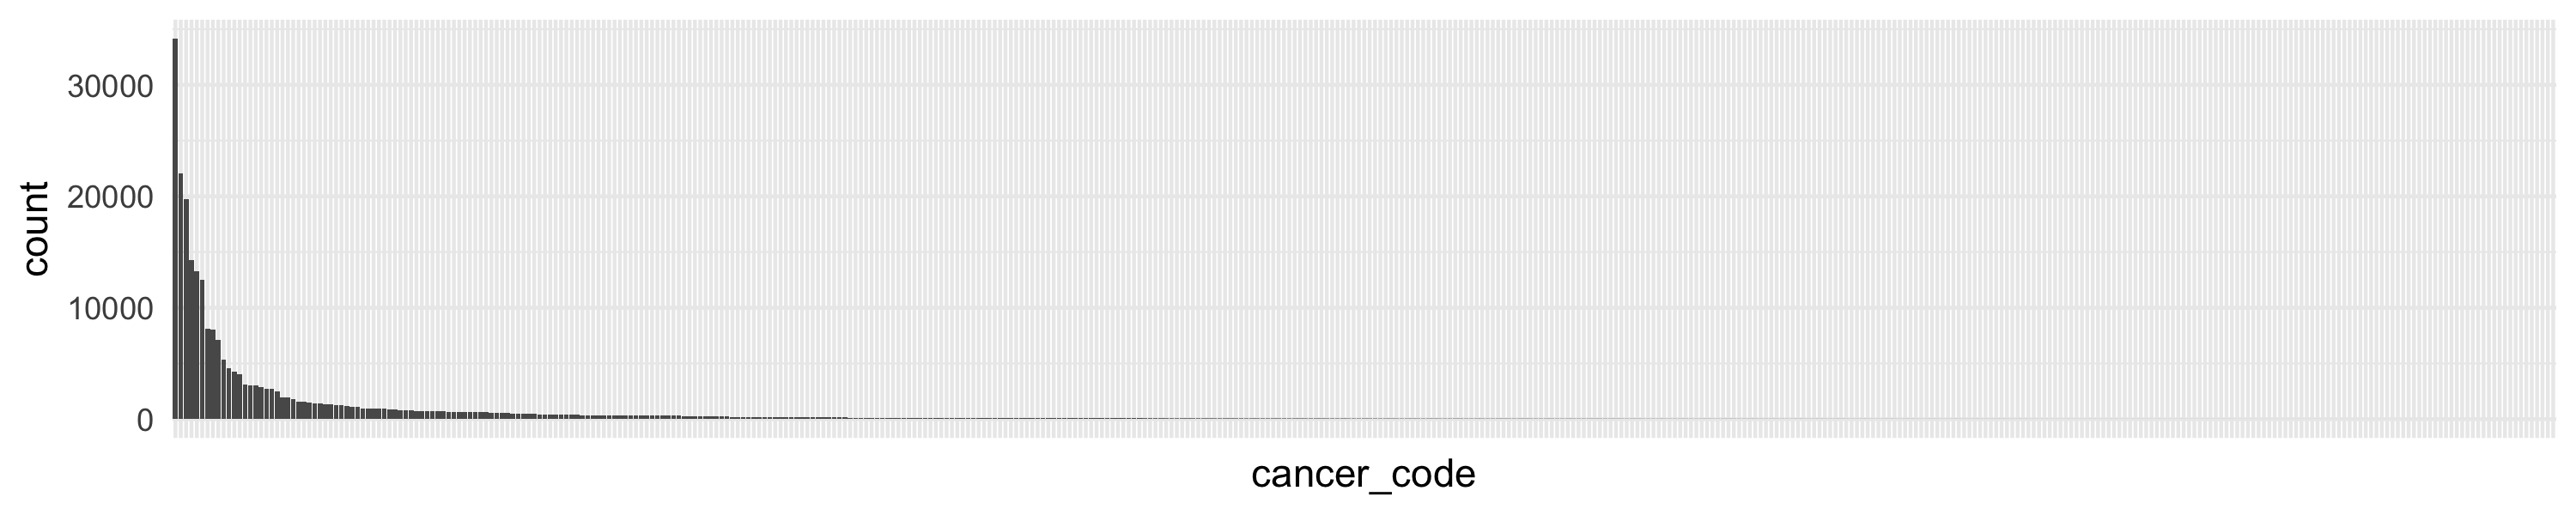

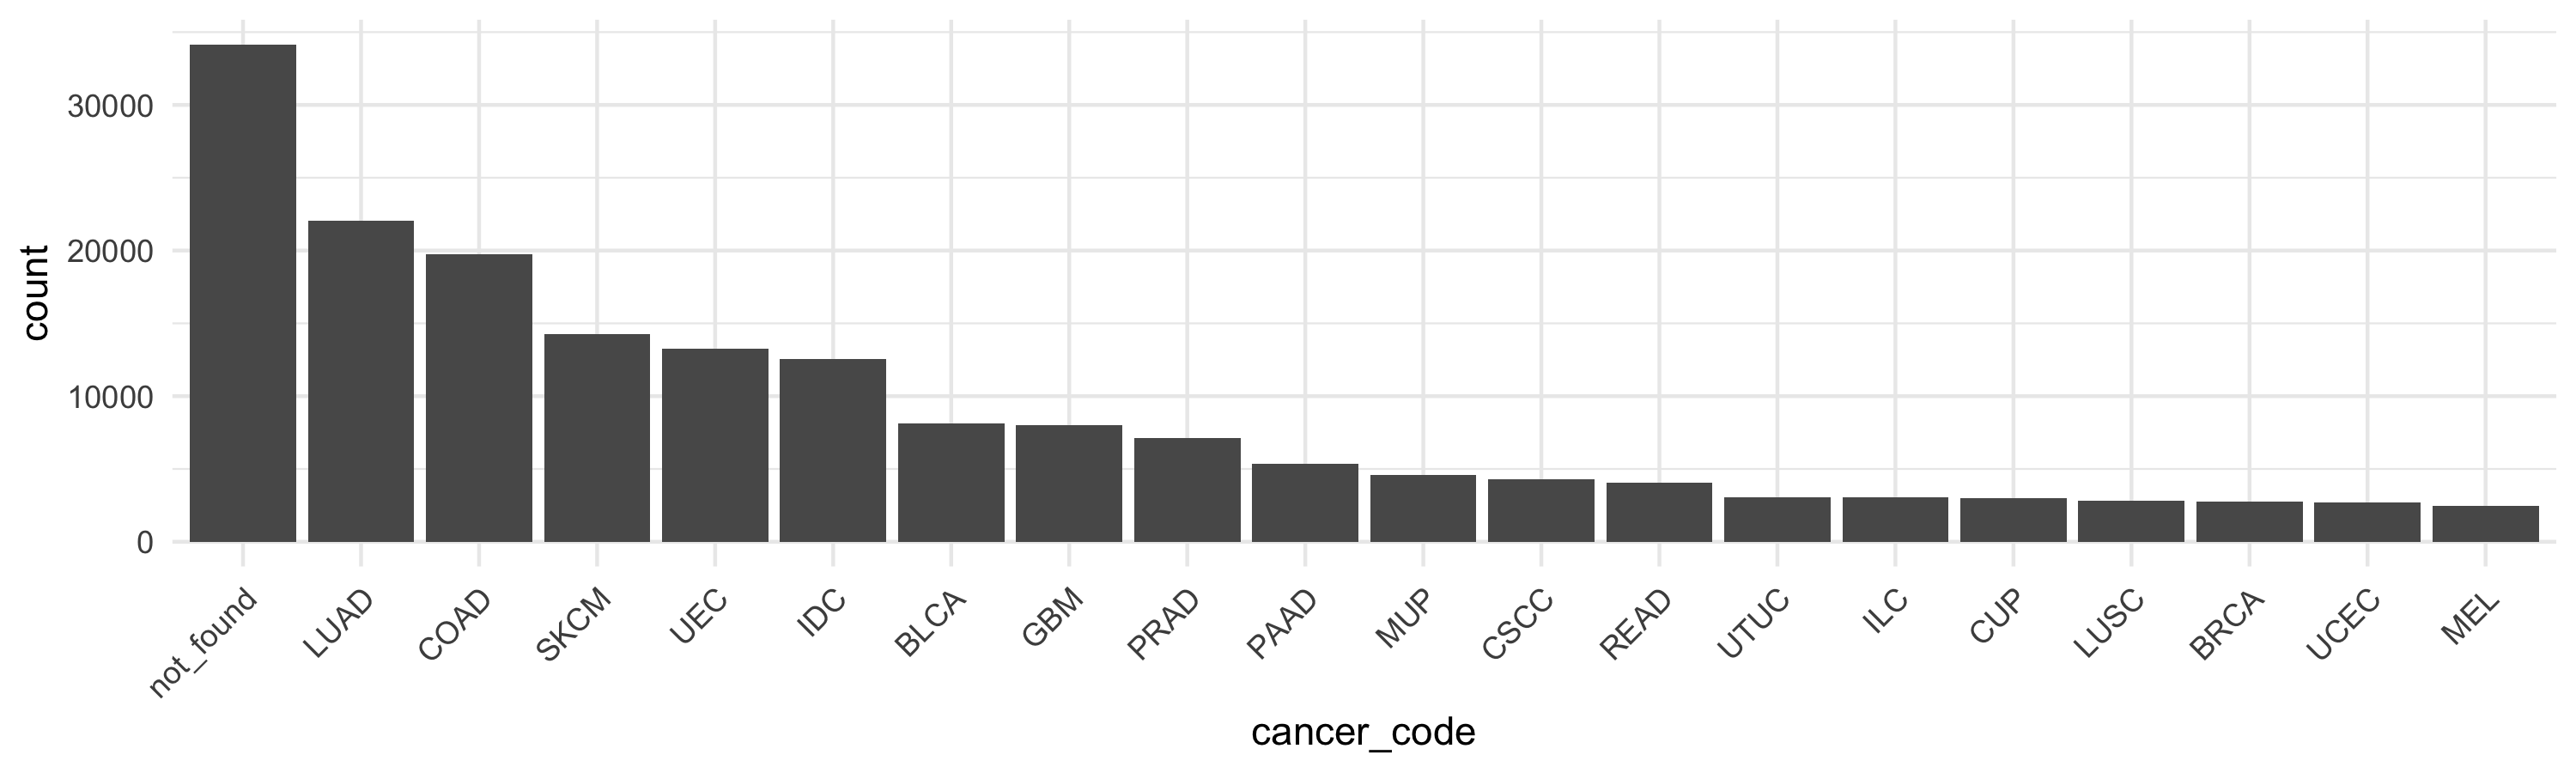

In [14]:
plot_histogram(impact, "cancer_code", height = 2) + theme(axis.text.x = element_blank())
plot_histogram_top(impact, "cancer_code", 20) + tilt_x_label_45()

### `cancer_type`

In [15]:
impact$cancer_type[is.na(impact$cancer_type)] <- "not_found"

In [16]:
head(impact$cancer_type)
length(unique(impact$cancer_type))

[1] "Breast" "Breast" "Breast" "Lung"   "Lung"   "Lung"

[1] 249

Number of patients with two or more `cancer_type`:

In [17]:
dd <- impact %>% group_by(patient_id) %>%
                 summarise(n_cancer_type = length(unique(cancer_type))) %>%
                 filter(n_cancer_type > 1)
print_count_and_proportion(nrow(dd), length(unique(impact$patient_id)))

[1] "302 over 21252 (1.42%)"

Plot of the most reccurent `cancer_type` **accross the rows**:

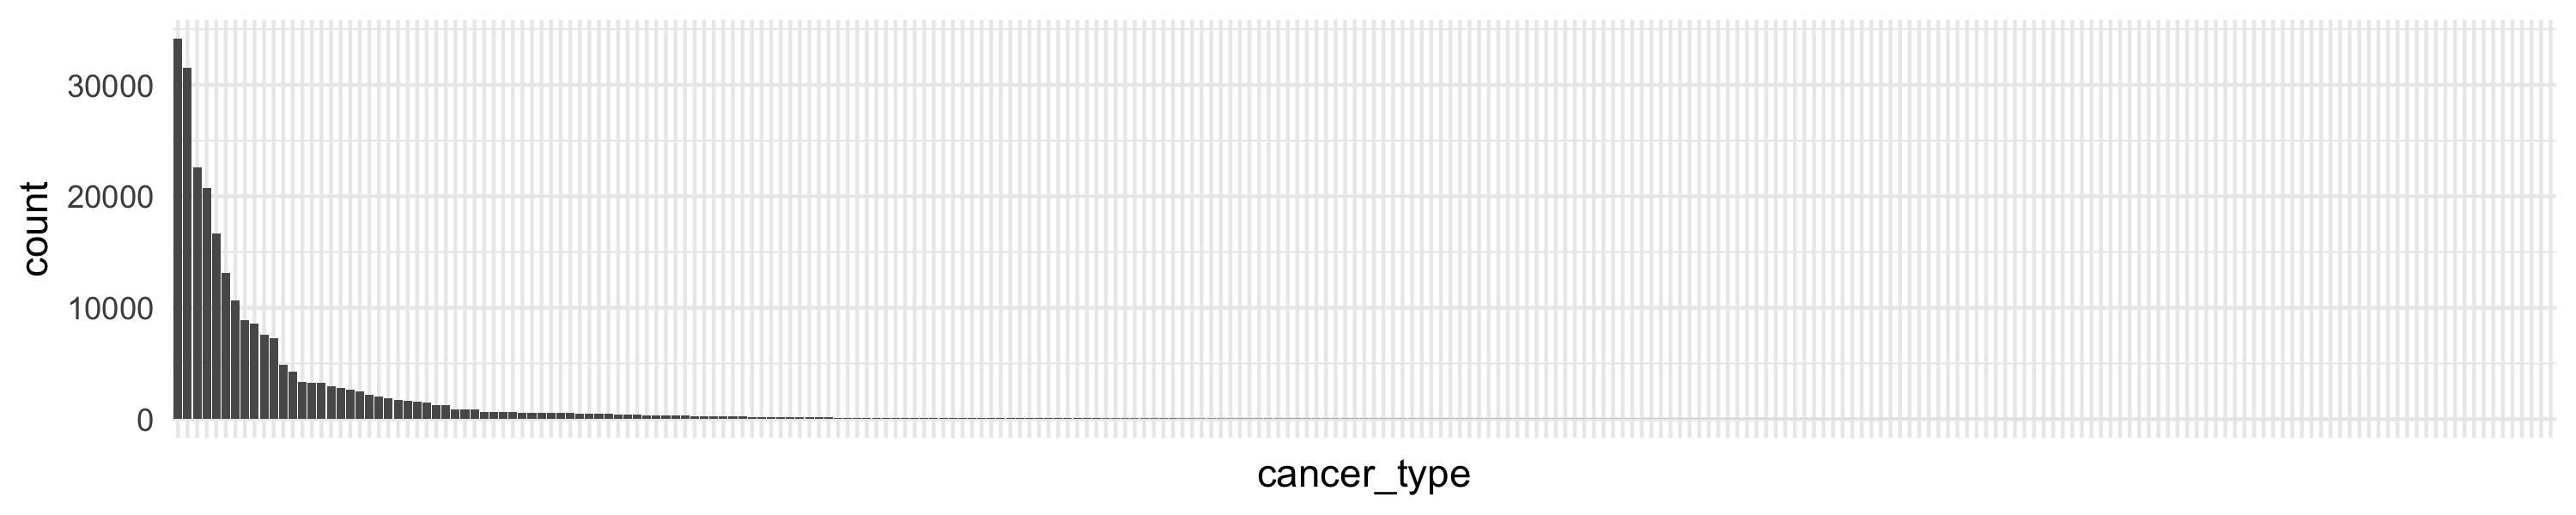

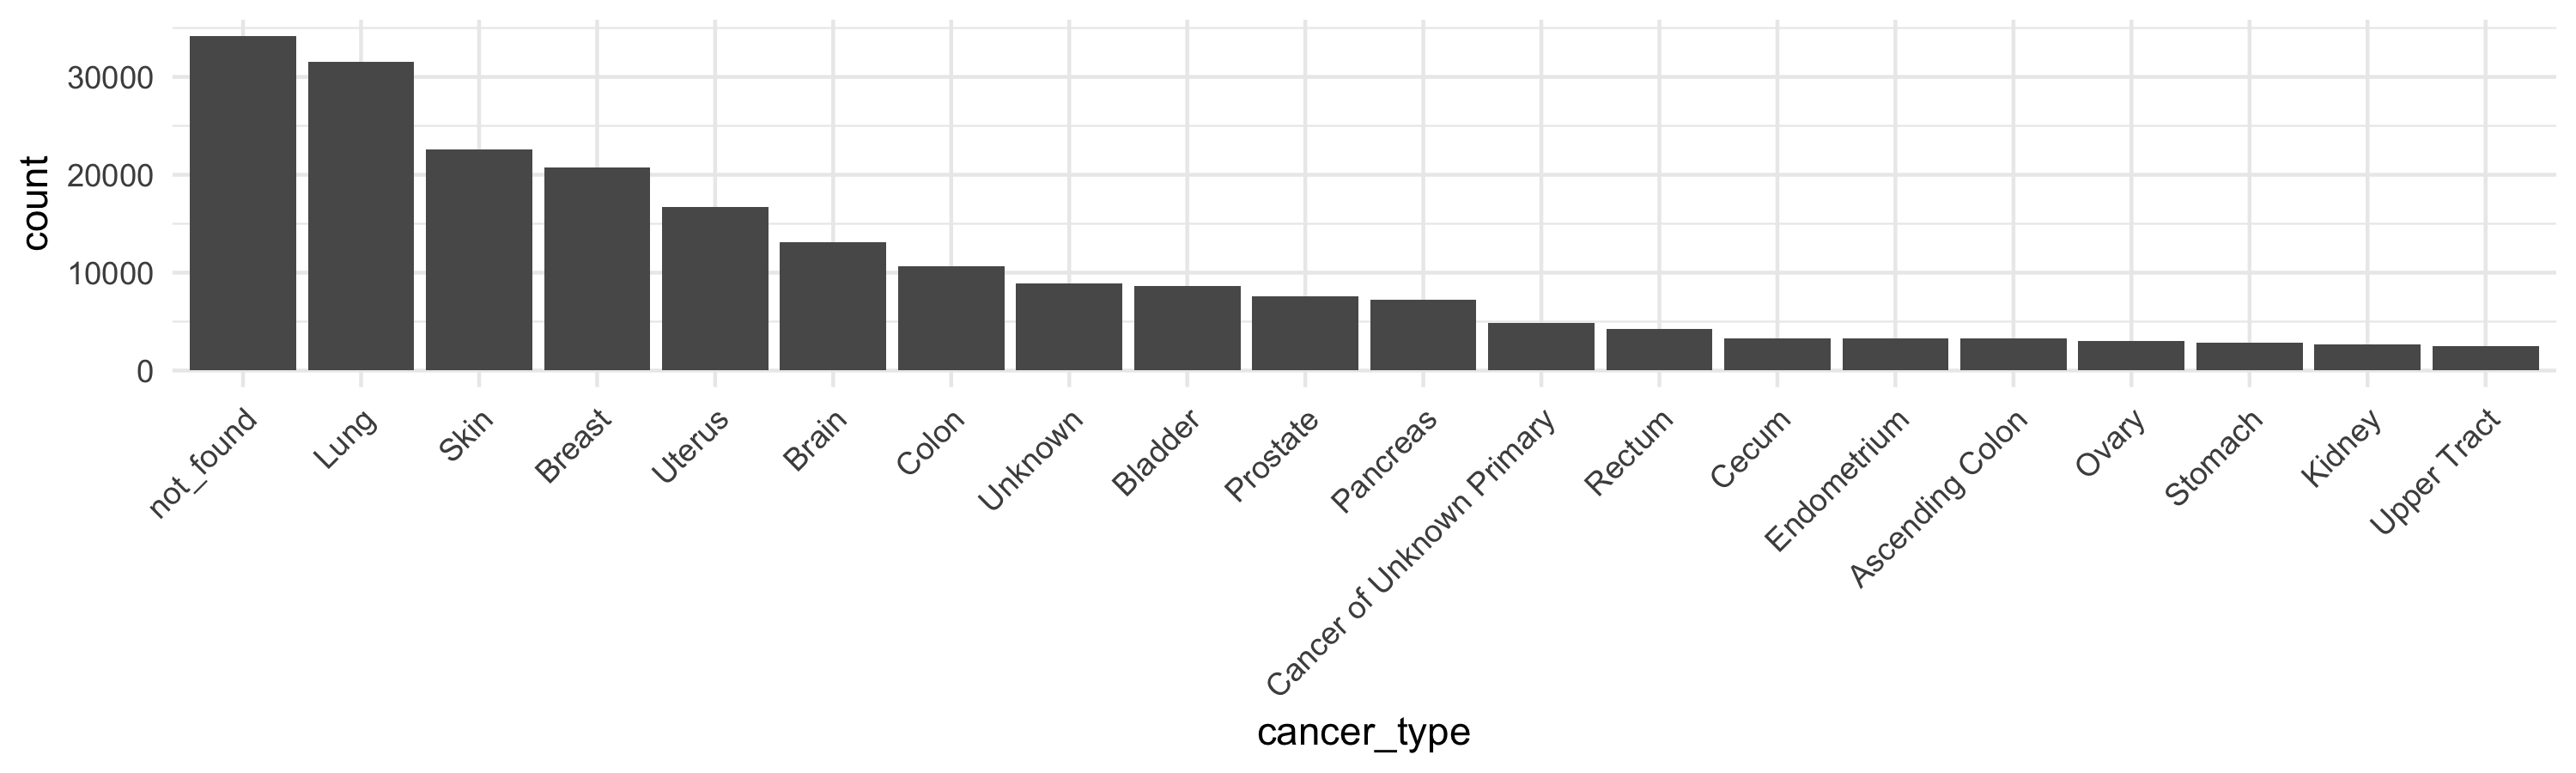

In [18]:
plot_histogram(impact, "cancer_type", height = 2) + theme(axis.text.x = element_blank())
plot_histogram_top(impact, "cancer_type", 20) + tilt_x_label_45()

## Test cbioportal

In [257]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


```shell
$ curl "http://www.cbioportal.org/webservice.do?cmd=getClinicalData&case_set_id=msk_impact_2017_all" --output cbioportal.txt```

In [223]:
cbioportal <- read.table("../../../data/other_databases/cbioportal.txt",
                         sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE)

In [224]:
head(cbioportal)

CASE_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,DNA_INPUT,MATCHED_STATUS,METASTATIC_SITE,ONCOTREE_CODE,OS_MONTHS,OS_STATUS,PRIMARY_SITE,SAMPLE_CLASS,SAMPLE_COLLECTION_SOURCE,SAMPLE_COVERAGE,SAMPLE_TYPE,SEX,SMOKING_HISTORY,SPECIMEN_PRESERVATION_TYPE,SPECIMEN_TYPE,TUMOR_PURITY,VITAL_STATUS
P-0005947-T01-IM5,Bladder Cancer,Upper Tract Urothelial Carcinoma,250,Matched,,UTUC,19.00,LIVING,Upper Tract,Tumor,In-House,648,Primary,Female,Unknown,DNA,Resection,80,ALIVE
P-0009180-T01-IM5,Melanoma,Cutaneous Melanoma,250,Matched,"Lymph Node, Regional",SKCM,NA,DECEASED,Skin,Tumor,In-House,750,Metastasis,Female,Never,FFPE,Resection,10,DECEASED
P-0008840-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250,Matched,Lymph Node,LUAD,1.78,LIVING,Lung,Tumor,In-House,978,Metastasis,Female,Prev/Curr Smoker,FFPE,Resection,30,ALIVE
P-0009304-T01-IM5,Glioma,Glioblastoma Multiforme,250,Matched,,GBM,1.22,LIVING,Brain,Tumor,Outside,1124,Primary,Female,Unknown,FFPE,Biopsy,50,ALIVE
P-0002010-T02-IM5,Ovarian Cancer,Clear Cell Ovarian Cancer,250,Matched,Liver,CCOV,6.28,DECEASED,Ovary,Tumor,In-House,862,Metastasis,Female,Never,FFPE,Resection,70,DECEASED
P-0004434-T01-IM5,Breast Cancer,Breast Invasive Lobular Carcinoma,250,Matched,Ipsilateral Breast,ILC,17.85,LIVING,Breast,Tumor,Outside,718,Metastasis,Female,Prev/Curr Smoker,DNA,Biopsy,50,ALIVE


In [253]:
get_table(unique(impact$Tumor_Sample_Barcode) %in% keys$Tumor_Sample_Barcode)
get_table(unique(impact$Tumor_Sample_Barcode) %in% cbioportal$CASE_ID)

unmatched_keys <- impact[! impact$Tumor_Sample_Barcode %in% keys$Tumor_Sample_Barcode,]
unmatched_cbio <- impact[! impact$Tumor_Sample_Barcode %in% cbioportal$CASE_ID,]

get_table(unique(unmatched_keys$Tumor_Sample_Barcode) %in% cbioportal$CASE_ID)

values,count,freq
TRUE,20040,87.2%
FALSE,2950,12.8%
-- total --,22990,100%


values,count,freq
FALSE,16283,70.8%
TRUE,6707,29.2%
-- total --,22990,100%


values,count,freq
FALSE,2064,70%
TRUE,886,30%
-- total --,2950,100%


## Resume of the operations needed to get the additional features

The following function `add_features()` adds the wanted feature to `impact` as done it the precedent sections, it will be added to `custom_tools.R`, as well as the `get_cosmic_count()` function created to parse `cosmic70`.

In [50]:
add_features <- function(data_folder_name, impact, annotations = FALSE, oncokb = FALSE, gene_type = FALSE,
                         keys_annotations = FALSE) {
    
    if (annotations) {
      # 1. Get the raw data
      impact_annotated <- read.table(paste0(data_folder_name, "/dominik/all_IMPACT_mutations_180508.simple.hg19_multianno.txt"),
                                     sep = "\t", stringsAsFactors = FALSE, header = TRUE)


      # 2. Create keys to join the two dataframes and extract the features
      impact_annotated$join_key <- paste(impact_annotated$Chr,
                                         impact_annotated$Start,
                                         impact_annotated$Ref,
                                         impact_annotated$Alt,
                                         sep = '_')
      impact_annotated <- unique(impact_annotated[, c("join_key", "Kaviar_AF", "cosmic70")])
      impact[, c("Kaviar_AF", "cosmic70")] <- left_join(impact, impact_annotated,
                                                        by = c("mut_key" = "join_key"))[, c("Kaviar_AF", "cosmic70")]


      # 3. Process the raw features
      ## Kaviar_AF
      impact$Kaviar_AF[(impact$Kaviar_AF == '.')] <- list('0')
      impact$Kaviar_AF <- sapply(impact$Kaviar_AF, function(s) as.double(s))

      ## cosmic_count
      impact$cosmic70[(impact$cosmic70 == '.')] <- list('OCCURENCE=0')
      impact$cosmic_count <- sapply(impact$cosmic70, get_cosmic_count)
      impact$cosmic70 <- NULL
    }
    
                                   
    if(oncokb) {
      # 1. Get the raw data
      impact_oncokb <- read.table(paste0(data_folder_name, "/annotate_with_oncokb/oncokb_annotated_cleaned_IMPACT_mutations_180508.txt"),
                                  sep = "\t", stringsAsFactors = FALSE, header = TRUE)


      # 2. Create keys to join the two dataframes and extract the features
      impact_oncokb <- unique(impact_oncokb[, c("mut_key", "is.a.hotspot", "is.a.3d.hotspot", "oncogenic")])
      impact[, c("is_a_hotspot", "is_a_3d_hotspot", "oncogenic")] <- left_join(impact, impact_oncokb,
                                                                               by = c("mut_key" = "mut_key"))[, c("is.a.hotspot",
                                                                                                                  "is.a.3d.hotspot",
                                                                                                                  "oncogenic")]


      # 3. Process the raw features
      ## is_a_hostpot
      impact$is_a_hotspot[impact$is_a_hotspot == "Y"  ] <- "yes"
      impact$is_a_hotspot[impact$is_a_hotspot != "yes"] <- "unknown"

      ## is_a_3d_hostpot
      impact$is_a_3d_hotspot[impact$is_a_3d_hotspot == "Y"  ] <- "yes"
      impact$is_a_3d_hotspot[impact$is_a_3d_hotspot != "yes"] <- "unknown"

      ## oncogenic
      impact$oncogenic[impact$oncogenic == ""] <- "Unknown"
    }


    if(gene_type) {
      # 1. Get the raw data
      cancer_genes_list <- read.table(paste0(data_folder_name, "/other_databases/CancerGenesList.txt"),
                                      sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment.char = '')


      # 2. Create keys to join the two dataframes and extract the features
      impact[, c("OncoKB.Oncogene", "OncoKB.TSG")] <- left_join(impact, cancer_genes_list,
                                                                by = c("Hugo_Symbol" = "Hugo.Symbol"))[,c("OncoKB.Oncogene", "OncoKB.TSG")]


      # 3. Process the raw features
      ## gene_type
      impact$gene_type <- "unknown"
      impact$gene_type[impact$OncoKB.Oncogene == "Yes"] <- "oncogene"
      impact$gene_type[impact$OncoKB.TSG == "Yes"]      <- "tsg"
      impact$gene_type[impact$OncoKB.Oncogene == "Yes" & impact$OncoKB.TSG == "Yes"] <- "oncogene_and_tsg"

      impact$OncoKB.Oncogene <- NULL
      impact$OncoKB.TSG      <- NULL
    }
          
                                 
    if(keys_annotations) {
     # 1. Get the raw data
     keys <- read.csv(paste0(data_folder_name, "/key.txt"), stringsAsFactors = FALSE, header = FALSE)
     colnames(keys) <- c("Tumor_Sample_Barcode", "BAM_id", "Group_id", "U1", "cancer_code", "U2", "cancer_type",
                         "U3", "cancer_type_2", "U4", "U5", "normal_sample", "U6", "U7")

     # 2. Create keys to join the two dataframes and extract the features
     impact[, c("BAM_id", "cancer_code", "cancer_type")] <- left_join(impact, keys,
                                                                      by = "Tumor_Sample_Barcode")[, c("BAM_id",
                                                                                                       "cancer_code",
                                                                                                       "cancer_type")]

     # 3. Process the raw features
     ## BAM_id
     impact$BAM_id[is.na(impact$BAM_id)] <- "not_found"
        
     ## cancer_code
     impact$cancer_code[is.na(impact$cancer_code)] <- "not_found"
        
     ## cancer_type
     impact$cancer_type[is.na(impact$cancer_type)] <- "not_found"
   }
                                 
                                                     
    return (impact)
}

In [51]:
impact <- get_cleaned_impact("../../../data")
impact <- add_features("../../../data", impact, annotations = TRUE,
                                                oncokb = TRUE,
                                                gene_type = TRUE,
                                                keys_annotations = TRUE)
ncol(impact)
nrow(impact)

[1] 35

[1] 248293

In [52]:
head(impact)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,⋯,frequency_in_normals,Kaviar_AF,cosmic_count,is_a_hotspot,is_a_3d_hotspot,oncogenic,gene_type,BAM_id,cancer_code,cancer_type
TP53,17,7577515,7577515,nonsynonymous_SNV,SNP,T,G,P-0000012-T02-IM3,c.766A>C,⋯,0,0.0e+00,1,unknown,unknown,Oncogenic,tsg,TL874300-T,IDC,Breast
ARID1A,1,27101572,27101572,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.4854C>G,⋯,0,0.0e+00,0,unknown,unknown,Unknown,tsg,TL874300-T,IDC,Breast
PTPRS,19,5244030,5244030,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.1452G>C,⋯,0,0.0e+00,0,unknown,unknown,Unknown,unknown,TL874300-T,IDC,Breast
PIK3R3,1,46521514,46521514,nonsynonymous_SNV,SNP,G,C,P-0000012-T03-IM3,c.894C>G,⋯,0,0.0e+00,0,unknown,unknown,Unknown,tsg,KV225804-T,LUAD,Lung
ATR,3,142178126,142178126,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,c.7292G>T,⋯,0,6.5e-06,0,unknown,unknown,Unknown,tsg,KV225804-T,LUAD,Lung
PDGFRA,4,55139732,55139732,nonsynonymous_SNV,SNP,T,A,P-0000012-T03-IM3,c.1393T>A,⋯,0,0.0e+00,0,unknown,unknown,Unknown,oncogene,KV225804-T,LUAD,Lung
